In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [4]:
pip install openpyxl==3.0.9

In [8]:
data = pd.read_excel('/content/drive/MyDrive/data3.xlsx',header=None)
print(data)

      0    1    2    3    4
0   5.1  3.5  1.4  0.2  1.0
1   4.9  3.0  1.4  0.2  1.0
2   4.7  3.2  1.3  0.2  1.0
3   4.6  3.1  1.5  0.2  1.0
4   5.0  3.6  1.4  0.2  1.0
..  ...  ...  ...  ...  ...
95  5.7  3.0  4.2  1.2  2.0
96  5.7  2.9  4.2  1.3  2.0
97  6.2  2.9  4.3  1.3  2.0
98  5.1  2.5  3.0  1.1  2.0
99  5.7  2.8  4.1  1.3  2.0

[100 rows x 5 columns]


In [10]:
m=data.shape[0]
datan=data.values
y=datan[:,4] #class labels
X=datan[:,0:3] #feature matrix

In [11]:
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


In [12]:
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X- xmin)/(xmax-xmin) #Normalization

In [13]:
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones
y=y-1

In [15]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z)) ###activation function  

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0) ## training test split

In [18]:
X_train.shape

(70, 4)

In [19]:
X_test.shape

(30, 4)

In [21]:
def cost_function(X,y,w): ###define cost function
  hypothesis = sigmoid(np.dot(X,w.T)) ###calculation of hypothesis for all instances
  J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))) ####as mention in
  return J

In [23]:
def batch_gradient_descent(X,y,w,alpha,iters):
  cost_history = np.zeros(iters) # cost function for each iteration
  #initalize our cost history list to store the cost function on every iteration
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w - (alpha/len(y)) * np.dot(hypothesis - y, X)
    cost_history[i] = cost_function(X,y,w)
  return w,cost_history

In [24]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size) * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [27]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
    return w,cost_history

In [28]:
#w= np.zeros(X.shape[1]) ###weight initialization
w = np.random.randn(1,X.shape[1]).ravel()
print(w)

[1.76405235 0.40015721 0.97873798 2.2408932 ]


In [29]:
alpha=0.02 ##learning rate
iters=2000 ###iterations
batch_w,J_his = batch_gradient_descent(X_train,y_train,w,alpha,iters)

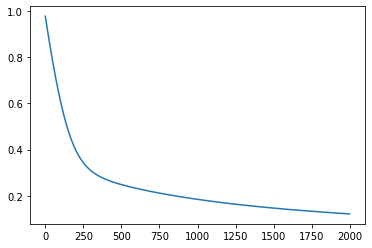

In [30]:
plt.plot(range(iters),J_his)
plt.show()

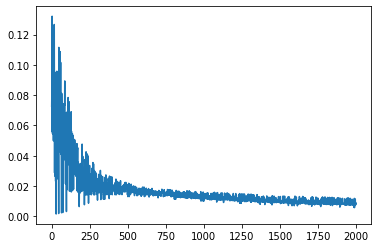

In [31]:
alpha=0.02
iters=2000
batch_size=5
mini_batch_w,J_mini_batch = MB_gradient_descent(X_train,y_train,w,alpha,iters, batch_size)
plt.plot(range(iters),J_mini_batch)
plt.show()

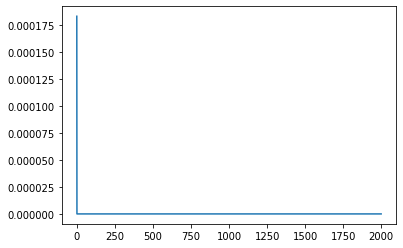

In [32]:
n_epochs=2000
alpha=0.02
w_n,J_sgd = stochastic_gradient_descent(X_train,y_train,w, alpha, n_epochs)
plt.plot(range(n_epochs),J_sgd)
plt.show()

In [33]:
z = np.dot(X_test, batch_w.T)
#z = np.dot(X_test, mini_batch_w.T)
#z = np.dot(X_test, w_n.T)
print(z)

[-1.46610773  2.25179616 -1.68795742  2.06449604  1.99778509  1.06068402
 -2.05259101  2.3482803   2.32596298  1.61435516  1.87456671  1.71829517
  2.0522638  -1.82770238 -1.56814159 -1.28990706 -2.30206673 -1.19986442
 -2.14668696 -1.42965202 -1.53812738  2.04623203 -1.43179919  1.63404328
 -1.42195513 -1.72441313 -1.74989199  1.6563606   1.54424166  2.5898181 ]


In [35]:
h = sigmoid(z)
y_pred=h>0.5
y_pred=y_pred.astype(int)
print(y_pred)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]


In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[15  0]
 [ 0 15]]


In [37]:
accuracy=(cm[0][0]+cm[1][1])/(len(y_test))

In [38]:
test_accuracy= np.sum(y_test == y_pred) / len(y_test)
print(test_accuracy)

1.0
